# California Energy Usage

## Scenario
You have been hired as a Data Scientist for a large-scale battery manufacturer, who is considering expanding their business to customers in California. Your first task is to provide an overview of the state of the California electric grid, with a focus on data driven analyses.

Based on a tip from a collegue, you start by looking into publically available data from the California Independent System Operator (CAISO), which oversees the majority of the California electrical power system.

In [26]:
# load required packages
# - numpy: vectorized math functions
# - matplotlib: plotting
# - pandas: data manipulation
# - seaborn: improved plot formatting

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Hourly Demand
You quickly find that CAISO publishes historical hourly load data on its website: http://www.caiso.com/planning/Pages/ReliabilityRequirements/Default.aspx#Historical

A copy of the 2014-2016 hourly load data has been included with this notebook (see "caiso_historical.csv").

**Questions:**
1. What data is included in the file?
2. How is the data organized?
3. Are there any oddities in the data (e.g. corrupted values or inconsistent units)?

*Hint:* With text-based data files, it's usually a good idea to start by inspecting the data with a text editor (Notepad++, Sublime, Atom, etc.).

After you get some sense of the data file (variables, organization, etc.), we can move into trying to load the data. For that, we'll make use of the pandas package (although you could use the Python stdlib or other packages, e.g., numpy).

In [10]:
# load the hourly demand [MW] data as a pandas DataFrame object
df = pd.read_csv('caiso_historical.csv',delimiter=',',
                 parse_dates=True,   # parse the timestamps
                 index_col=0         # use the timestamps as the index
)

# check how much data we have
print(df.shape)

# verify that the data looks "correct"
print(df.head())

(26304, 5)
                       PGE   SCE  SDGE  VEA  CAISO
timestamp                                         
2014-01-01 00:00:00  10057  9862  2096   58  22073
2014-01-01 01:00:00   9707  9530  1986   59  21283
2014-01-01 02:00:00   9438  9200  1936   61  20635
2014-01-01 03:00:00   9309  9015  1896   64  20283
2014-01-01 04:00:00   9319  8987  1899   67  20271


### Quick time-series visualization
Now that we've got the data loaded, let's try a few quick plots.

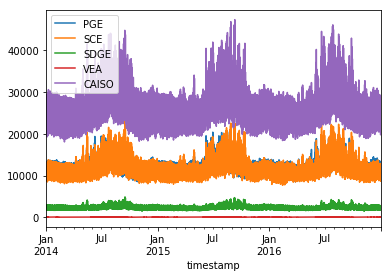

In [47]:
# pandas has some standard plot functions built-in
df.plot()
plt.show()

**Question:** What are the units of the load data? The data file doesn't list units, but you should be able to guess based on information from the CAISO website: http://www.caiso.com/outlook.html

### Summary statistics
The next obvious thing to try is to look at some summary statistics of the data (e.g. min, mean and max values of each variable).

In [13]:
# get summary statistics of the data
print(df.describe())

                PGE           SCE          SDGE           VEA         CAISO
count  26304.000000  26304.000000  26304.000000  26304.000000  26304.000000
mean   12027.507337  11977.213390   2407.596905     60.282885  26472.602874
std     1972.575944   2529.705633    491.528999     18.622579   4880.773258
min     8245.000000   7666.000000   1452.000000      8.000000  18030.000000
25%    10597.000000  10108.750000   2033.000000     47.000000  22831.000000
50%    11792.000000  11545.000000   2355.000000     55.000000  25817.500000
75%    12956.000000  12998.000000   2677.000000     71.000000  28709.500000
max    20462.000000  23597.000000   4867.000000    134.000000  47257.000000


**Question:** Do you notice anything in the summary statistics? Alternatively, is there anything "missing" from the summary statistics (i.e. other info you wish you had)?

### Effect of time of day
Since we're looking at an electric grid, it's natural to want to understand the effect of time on the variables. Let's start with looking at the hourly load as a function of the hour of the day.

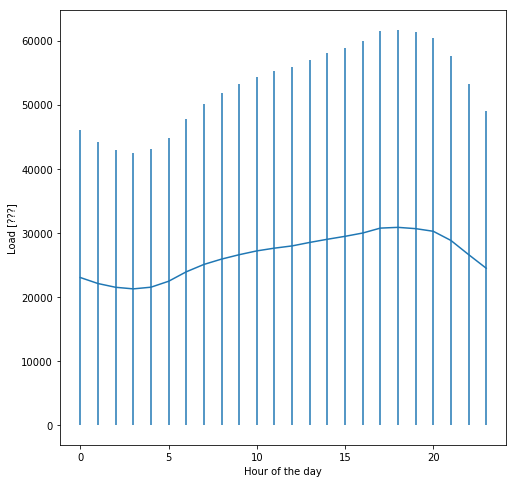

In [46]:
# We could write custom code, but instead we'll leverage some of the
# built-in functionality available in pandas. Specifically, we'll use
# the ``groupby`` function to automatically cluster the data.
#

# get CAISO total load as a function of the hour of the day
load_mean = df['CAISO'].groupby(df.index.hour).mean()
load_std = df['CAISO'].groupby(df.index.hour).mean()

# compare loud by hour of the day
hours = range(24)
plt.figure(figsize=(8, 8))
plt.errorbar(hours, load_mean, yerr=load_std)
plt.xlabel('Hour of the day')
plt.ylabel('Load [???]')
plt.show()

**Question:** What does looking at data by the hour of the day tells us?

**Task:** Now try the same analysis on the load data for each utility (PGE, SCE, SDGE and VEA) and compare.

In [21]:
# (put your code here)


### Effect of time of week
Now let's look at how the time of the week effects the data (e.g. weekday vs weekend). We'll aim to make the same plots as before, but this time we'll group by the day of the week.

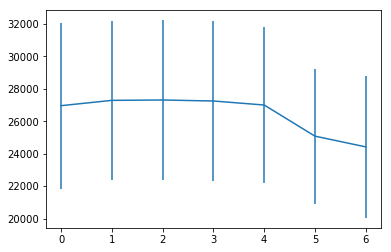

In [25]:
# get load by the day of the week
load_mean = df['???'].groupby(df.index.dayofweek).mean()
load_std = ???

# plot
days = range(7)
plt.figure(figsize=(???, ???))
plt.errorbar(???)
plt.show()

**Question:** What does looking at data by the day of the week tell us?

**Task:** Now try the same analysis on the load data for each utility (PGE, SCE, SDGE and VEA) and compare.

### Advanced visualization
Now that we have some initial understanding of the effects of time on the load data, let's try to make a couple polished figures. For this, we'll leverage the seaborn package, which provides some advanced features not found in the base matplotlib package.

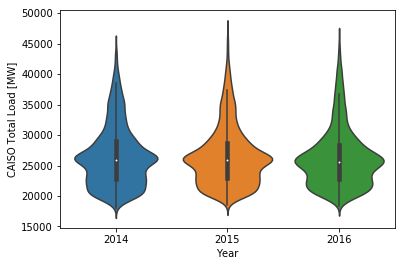

In [30]:
# violinplots are a nice way to compare distributions
sns.violinplot(data=df, x=df.index.year, y='CAISO')
plt.xlabel('Year')
plt.ylabel('CAISO Total Load [MW]')
plt.show()

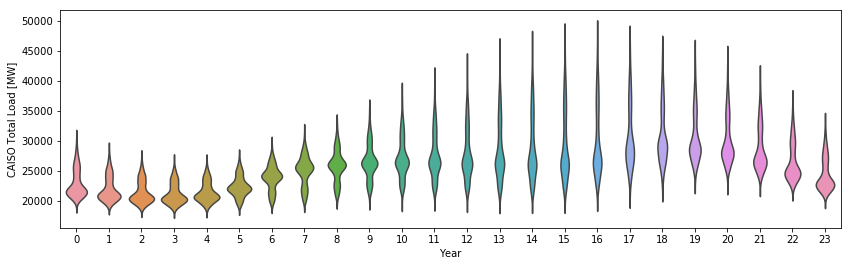

In [42]:
# violinplots are a nice way to compare distributions
plt.figure(figsize=(14, 4))
sns.violinplot(data=df, x=df.index.hour, y='CAISO', inner=None)
plt.xlabel('Year')
plt.ylabel('CAISO Total Load [MW]')
plt.show()